# New Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving Expenses.xlsx to Expenses.xlsx


In [2]:
df = pd.read_excel('Expenses.xlsx')
print(df.head())

   S.No      Name month  Gas  House Rent  Milk  Electricity Bill   Loan  \
0     1      Ammu  July  283        2433   400               266      0   
1     2  Pravalli  July    0           0     0                 0  67000   
2     3       Anu  July  283        2433   400               266      0   
3     4    Venkat  July  283        2433   400               266      0   
4     5      Ammu  June  283        2433   400               333      0   

   Dwakra  LIC  ...  Clothes  Trips  Products  Vegetables  Petrol  Fruits  \
0       0    0  ...     1000   1000       500         266       0     333   
1       0    0  ...        0      0       500           0       0       0   
2    5300    0  ...      500    500         0         266       0     333   
3       0    0  ...        0      0         0         266    3000     333   
4       0    0  ...        0  10000       500         266       0     666   

   Mobile Recharge   NV  Junk food  Groceries  
0              800  500        500    

In [7]:
print(df.info())
print("Null Value count:")
print(df.isnull().sum())
print("\nNumber of duplicates:", df.duplicated().sum())
if 'S.No' in df.columns:
    df.drop('S.No', axis=1, inplace=True)
    print("\nDropped 'S.No' column")
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)
expense_columns = df.columns[3:]
df[expense_columns] = df[expense_columns].replace(0, np.nan)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("\nAfter cleaning:")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              40 non-null     object  
 1   month             40 non-null     category
 2   gas               40 non-null     int64   
 3   house_rent        30 non-null     float64 
 4   milk              30 non-null     float64 
 5   electricity_bill  30 non-null     float64 
 6   loan              12 non-null     float64 
 7   dwakra            10 non-null     float64 
 8   lic               2 non-null      float64 
 9   cable             30 non-null     float64 
 10  clothes           12 non-null     float64 
 11  trips             26 non-null     float64 
 12  products          20 non-null     float64 
 13  vegetables        30 non-null     float64 
 14  petrol            10 non-null     float64 
 15  fruits            30 non-null     float64 
 16  mobile_recharge   8 non-null

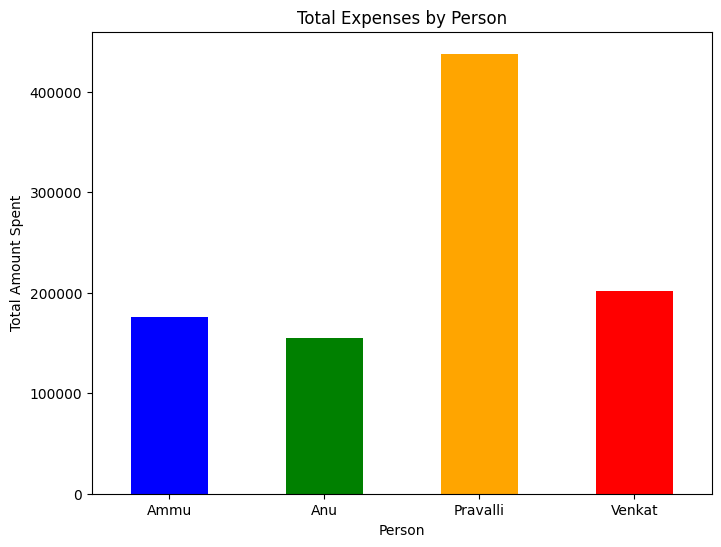

In [8]:
# Calculate total expenses by person
person_totals = df.groupby('name')[expense_columns].sum().sum(axis=1)

plt.figure(figsize=(8, 6))
person_totals.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Total Expenses by Person')
plt.xlabel('Person')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-9-3167877203.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_totals = df.groupby('month')[expense_columns].sum().sum(axis=1)


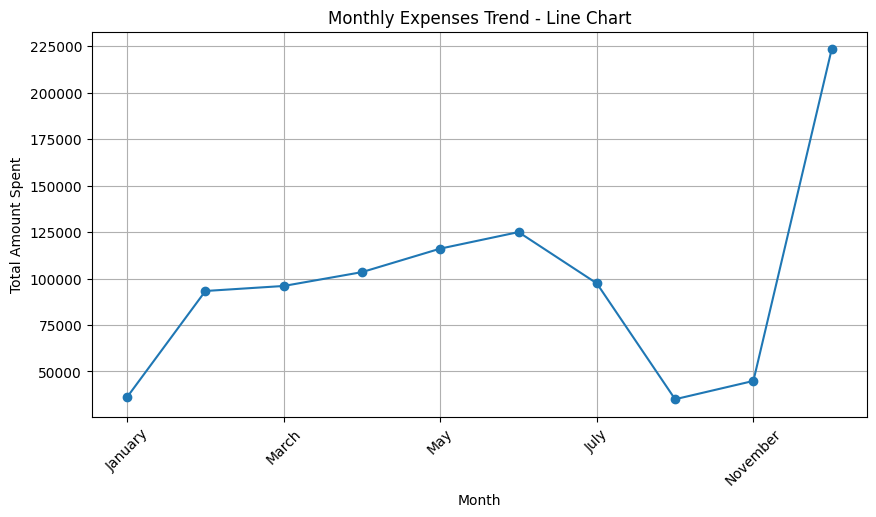

In [9]:
# Calculate total expenses by month
#Stacked Bar Chart
monthly_totals = df.groupby('month')[expense_columns].sum().sum(axis=1)

plt.figure(figsize=(10, 5))
monthly_totals.plot(kind='line', marker='o')
plt.title('Monthly Expenses Trend - Line Chart')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

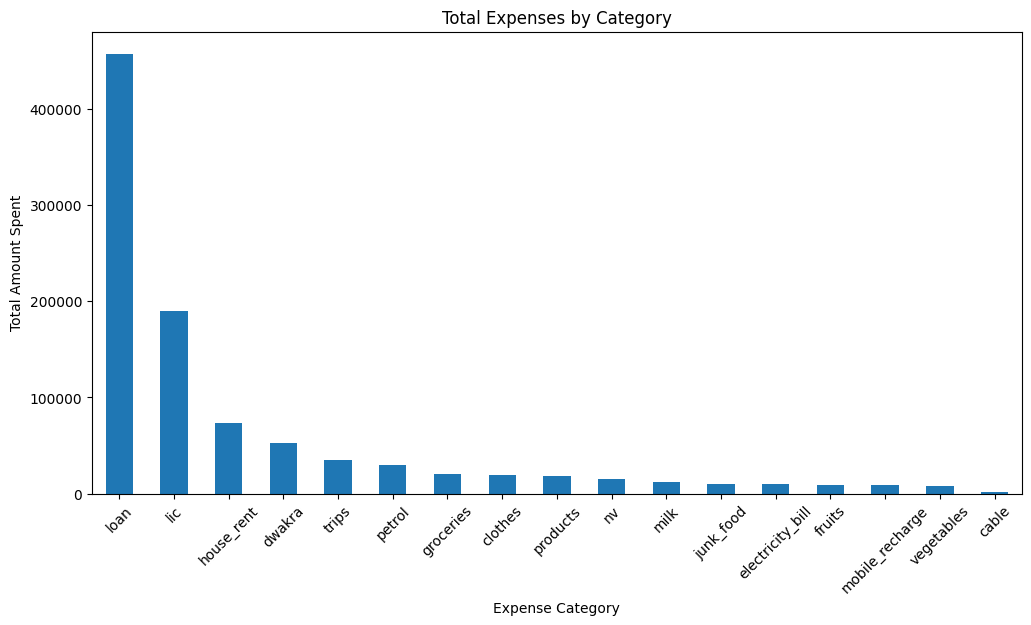

In [10]:
# Calculate total for each expense category
# Box Plot
category_totals = df[expense_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_totals.plot(kind='bar')
plt.title('Total Expenses by Category')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

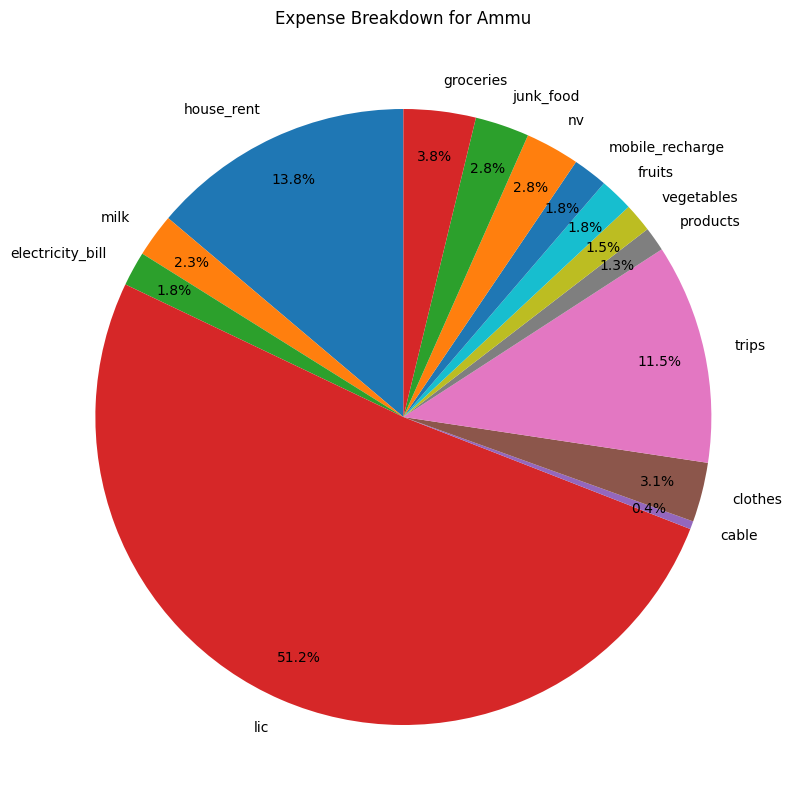

In [11]:
# Select one person (change name as needed)
person = 'Ammu'
person_data = df[df['name'] == person][expense_columns].sum()
person_data = person_data[person_data > 0]
plt.figure(figsize=(10, 10))
person_data.plot(kind='pie', autopct='%1.1f%%', startangle=90,pctdistance=0.85)
plt.title(f'Expense Breakdown for {person}')
plt.ylabel('')  # Remove y-label
plt.tight_layout
plt.show()

<Figure size 1000x600 with 0 Axes>

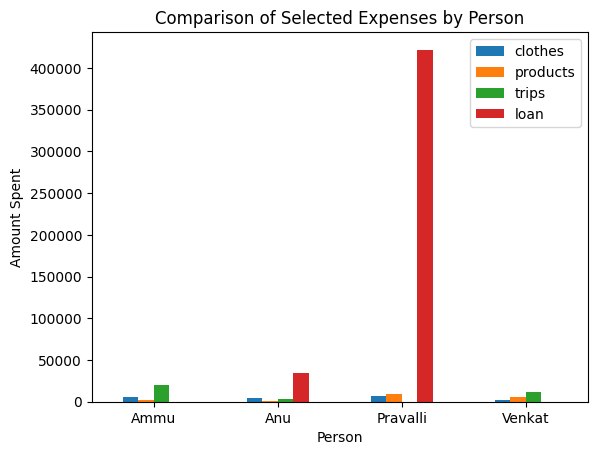

In [12]:
# Compare specific expenses across people
compare_cols = ['clothes', 'products', 'trips', 'loan']

plt.figure(figsize=(10, 6))
df.groupby('name')[compare_cols].sum().plot(kind='bar')
plt.title('Comparison of Selected Expenses by Person')
plt.xlabel('Person')
plt.ylabel('Amount Spent')
plt.xticks(rotation=0)
plt.show()

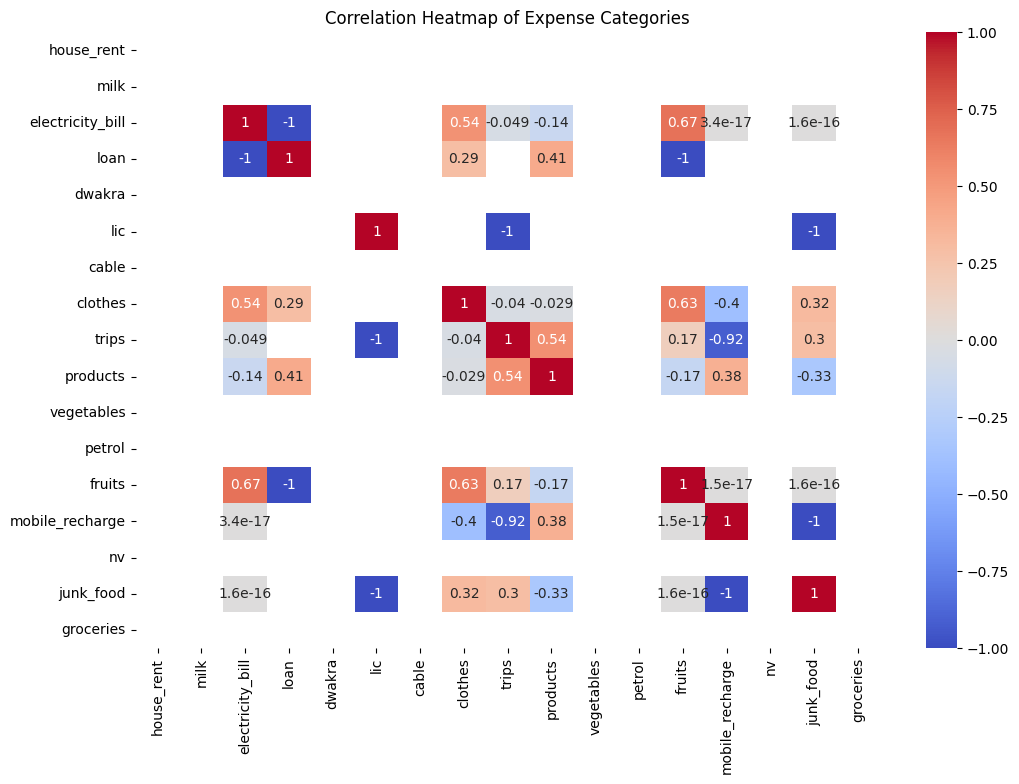

In [13]:
# Calculate correlation between expense categories
plt.figure(figsize=(12, 8))
sns.heatmap(df[expense_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Expense Categories')
plt.show()

/tmp/ipython-input-14-891103639.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_expenses = df.groupby('month')[expense_columns].sum()


<Figure size 1200x600 with 0 Axes>

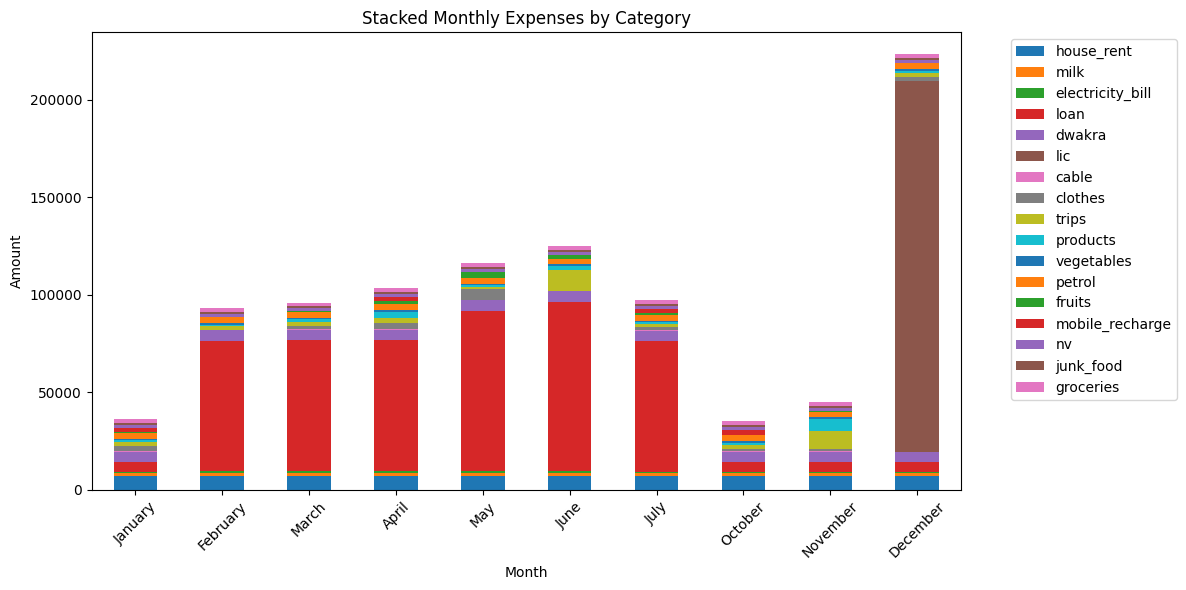

In [14]:
# Group by month and sum expenses
monthly_expenses = df.groupby('month')[expense_columns].sum()

plt.figure(figsize=(12, 6))
monthly_expenses.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Stacked Monthly Expenses by Category')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-16-1058124777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df.groupby('month')[category].sum()


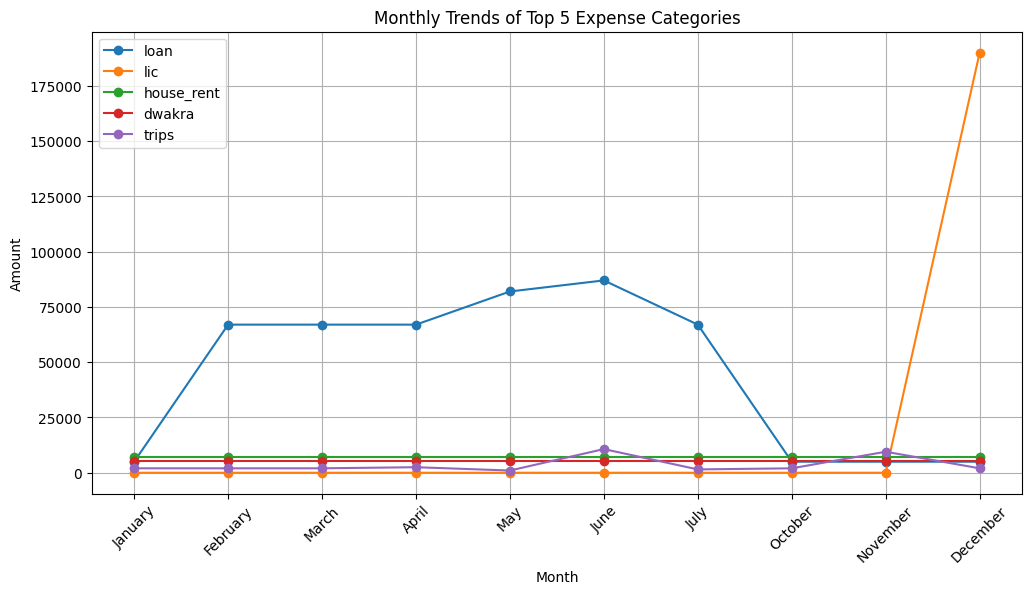

In [16]:
# Line Chart of Monthly Trends for Top 5 Expense Categories
top_categories = df[expense_columns].sum().nlargest(5).index
plt.figure(figsize=(12, 6))
for category in top_categories:
    monthly_data = df.groupby('month')[category].sum()
    plt.plot(monthly_data.index, monthly_data.values, marker='o', label=category)
plt.title('Monthly Trends of Top 5 Expense Categories')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-17-3947684282.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df.groupby('month')[top_categories].sum()


<Figure size 1200x600 with 0 Axes>

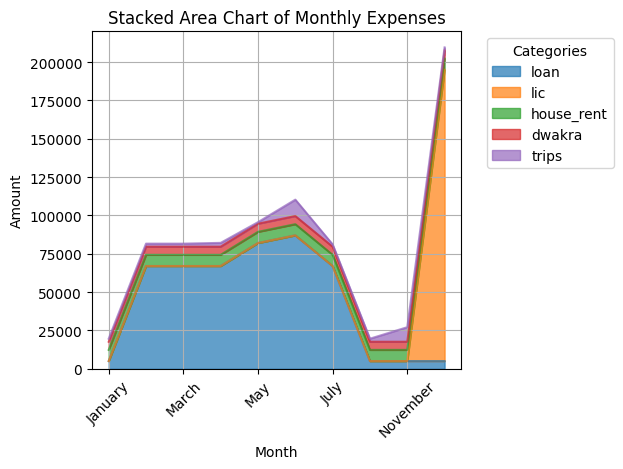

In [17]:
# Stacked Area Chart of Monthly Expenses
top_categories = df[expense_columns].sum().nlargest(5).index
monthly_data = df.groupby('month')[top_categories].sum()

plt.figure(figsize=(12, 6))
monthly_data.plot(kind='area', stacked=True, alpha=0.7)
plt.title('Stacked Area Chart of Monthly Expenses')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-18-1443271359.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_totals = df.groupby(['Month_num'])[expense_columns].sum().sum(axis=1).reset_index()


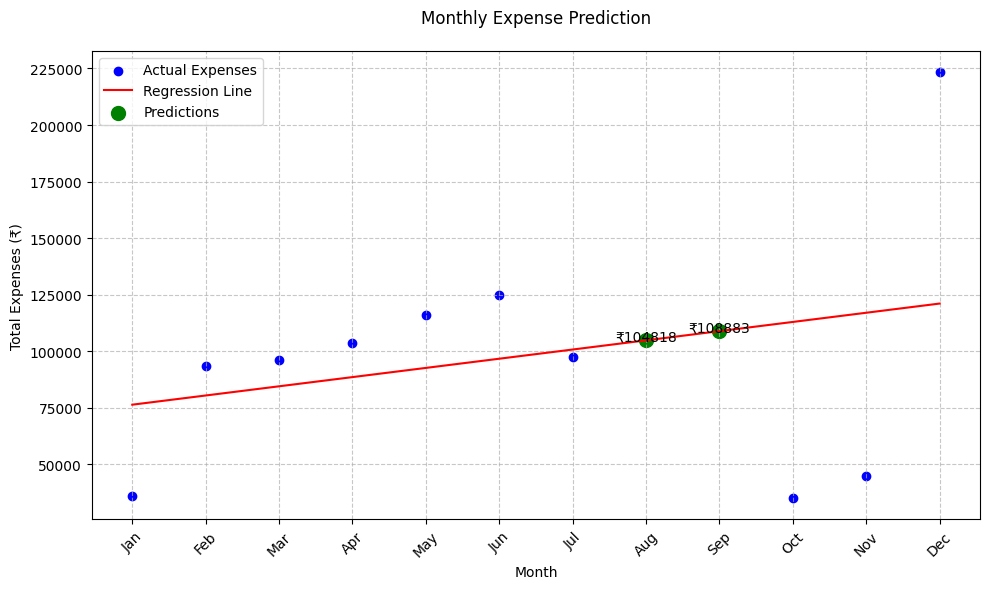

Trend Equation: Total = 4064.71 * Month + 72300.79
Predicted expenses for Aug: ₹104818.44
Predicted expenses for Sep: ₹108883.15


In [18]:

from sklearn.linear_model import LinearRegression

# 1. Prepare data (sum expenses per month)
df['Month_num'] = df['month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
})
monthly_totals = df.groupby(['Month_num'])[expense_columns].sum().sum(axis=1).reset_index()
monthly_totals.columns = ['Month_num', 'Total_Expenses']

# 2. Train linear regression model
X = monthly_totals[['Month_num']]  # Feature (month number)
y = monthly_totals['Total_Expenses']  # Target (total expenses)
model = LinearRegression()
model.fit(X, y)

# 3. Predict future months (August=8, September=9, etc.)
future_months = pd.DataFrame({'Month_num': [8, 9,]})  # Aug, Sep, Oct
predictions = model.predict(future_months)

# 4. Visualize past data + predictions
plt.figure(figsize=(10, 6))
# Plot historical data
plt.scatter(X, y, color='blue', label='Actual Expenses')
# Plot regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')
# Plot predictions
plt.scatter(future_months, predictions, color='green', s=100, label='Predictions')
for i, month in enumerate(future_months['Month_num']):
    plt.text(month, predictions[i]+100, f'₹{predictions[i]:.0f}', ha='center')

# Formatting
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(1,13), month_names, rotation=45)
plt.title('Monthly Expense Prediction', pad=20)
plt.xlabel('Month')
plt.ylabel('Total Expenses (₹)')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print prediction details
print(f"Trend Equation: Total = {model.coef_[0]:.2f} * Month + {model.intercept_:.2f}")
for month, pred in zip(future_months['Month_num'], predictions):
    print(f"Predicted expenses for {month_names[month-1]}: ₹{pred:.2f}")

                MODEL PERFORMANCE                 
R² Score: -0.3449
Mean Squared Error (MSE): 629841586.41
Root Mean Squared Error (RMSE): 25096.64
Trend Equation: Total Expenses = 2385.73 * month_num + 14514.75

                FUTURE PREDICTIONS                
August: ₹33,600.61
September: ₹35,986.34


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



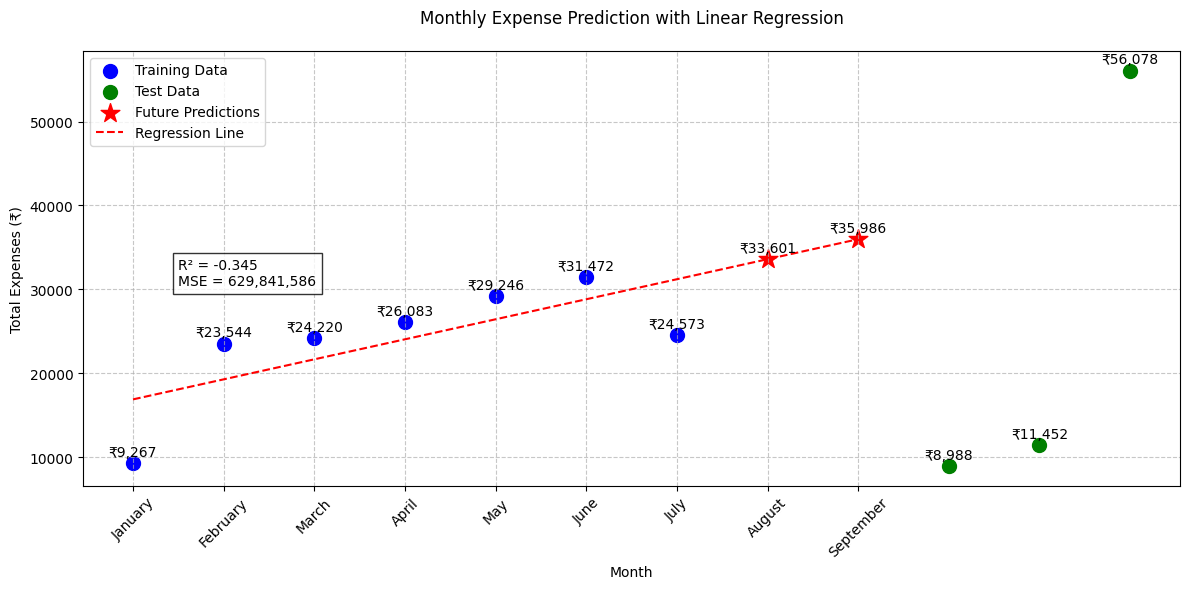

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Load and prepare data
df = pd.read_excel('Expenses.xlsx')
# Convert month names to numerical values (January=1, February=2, etc.)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['month_num'] = df['month'].apply(lambda x: month_order.index(x) + 1)
# Calculate total expenses per month per person
expense_columns = df.columns[3:]  # All columns after 'month'
df['total_expenses'] = df[expense_columns].sum(axis=1)
# Group by month and calculate average expenses
monthly_expenses = df.groupby('month_num')['total_expenses'].mean().reset_index()
# Prepare data for modeling
X = monthly_expenses[['month_num']]
y = monthly_expenses['total_expenses']
# Split data - use first 7 months for training, last 5 for testing
X_train = X[X['month_num'] <= 7]
y_train = y[X['month_num'] <= 7]
X_test = X[X['month_num'] > 7]
y_test = y[X['month_num'] > 7]
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
# Calculate metrics
r2 = r2_score(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
# Predict for August (8) and September (9)
future_months = pd.DataFrame({'month_num': [8, 9]})
future_pred = model.predict(future_months)
# Print results
print("="*50)
print(f"{'MODEL PERFORMANCE':^50}")
print("="*50)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"Trend Equation: Total Expenses = {model.coef_[0]:.2f} * month_num + {model.intercept_:.2f}")
print("\n" + "="*50)
print(f"{'FUTURE PREDICTIONS':^50}")
print("="*50)
for month, pred in zip(['August', 'September'], future_pred):
    print(f"{month}: ₹{pred:,.2f}")
# Visualization
plt.figure(figsize=(12, 6))
# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', s=100)
# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test Data', s=100)
# Plot future predictions
plt.scatter(future_months, future_pred, color='red', marker='*', s=200, label='Future Predictions')
# Plot regression line
x_line = np.linspace(1, 9, 100)
plt.plot(x_line, model.predict(x_line.reshape(-1, 1)), 'r--', label='Regression Line')
# Add value labels
for x, y in zip(np.concatenate([X_train.values.flatten(), X_test.values.flatten(), future_months.values.flatten()]),
               np.concatenate([y_train.values, y_test.values, future_pred])):
    plt.text(x, y+500, f'₹{y:,.0f}', ha='center', va='bottom')
# Add metrics to plot
plt.text(1.5, max(y_train)-1000,
         f'R² = {r2:.3f}\nMSE = {mse:,.0f}',
         bbox=dict(facecolor='white', alpha=0.8))
# Formatting
plt.xticks(np.arange(1, 10), month_order[:9], rotation=45)
plt.title('Monthly Expense Prediction with Linear Regression', pad=20)
plt.xlabel('Month')
plt.ylabel('Total Expenses (₹)')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

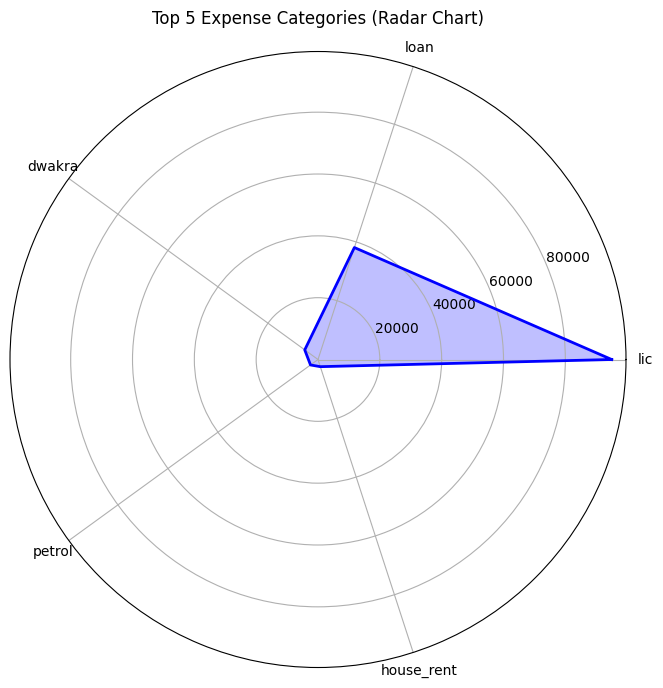

In [19]:
# Select top 5 expense categories
top_categories = df[expense_columns].mean().nlargest(5).index
values = df[top_categories].mean().tolist()
values += values[:1]  # Close the loop

# Calculate angles
angles = np.linspace(0, 2*np.pi, len(top_categories), endpoint=False).tolist()
angles += angles[:1]

# Create plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, 'b-', linewidth=2)
ax.fill(angles, values, 'b', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_categories)
plt.title('Top 5 Expense Categories (Radar Chart)', pad=20)
plt.grid(True)
plt.show()

In [23]:
import plotly.graph_objects as go

# Get total expenses per category (can filter for a person too)
waterfall_data = df[expense_columns].sum().sort_values(ascending=False)
waterfall_df = waterfall_data.reset_index()
waterfall_df.columns = ['Category', 'Amount']

# Create waterfall chart
fig = go.Figure(go.Waterfall(
    name="Expenses",
    orientation="v",
    x=waterfall_df['Category'],
    y=waterfall_df['Amount'],
    connector={"line":{"color":"rgb(63, 63, 63)"}},
    increasing={"marker":{"color":"green"}},
    decreasing={"marker":{"color":"red"}},
    totals={"marker":{"color":"blue"}}
))

fig.update_layout(
    title="Waterfall Chart of Expenses by Category",
    waterfallgap=0.3
)
fig.show()


In [22]:
import plotly.express as px

# Sum total expenses by category for all people (or a specific person)
funnel_data = df[expense_columns].sum().sort_values(ascending=False)
funnel_df = funnel_data.reset_index()
funnel_df.columns = ['Category', 'Amount']

# Plot funnel chart
fig = px.funnel(funnel_df, x='Amount', y='Category', title='Expense Funnel (All Categories)')
fig.show()


In [29]:
import pandas as pd
import plotly.express as px

# Load and prepare data (using your existing cleaning steps)
df = pd.read_excel('Expenses.xlsx')

# Drop S.No column if it exists
if 'S.No' in df.columns:
    df.drop('S.No', axis=1, inplace=True)

# Identify expense columns (all columns except Name and Month)
expense_columns = [col for col in df.columns if col not in ['Name', 'Month', 'month', 'month_num']]

# Calculate total expenses per category
category_totals = df[expense_columns].sum().reset_index()
category_totals.columns = ['Category', 'Amount']

# Create Tree Map
fig = px.treemap(category_totals,
                 path=['Category'],
                 values='Amount',
                 color='Amount',
                 color_continuous_scale='Blues',
                 title='Expense Categories Tree Map')

# Customize hover data
fig.update_traces(textinfo="label+value+percent parent",
                 hovertemplate='<b>%{label}</b><br>Amount: ₹%{value:,}<br>%{percentParent:.1%} of total')

# Update layout
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig.show()